In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [107]:
df1 = pd.read_csv("/content/dataset_house.csv")
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [108]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [109]:
df1.shape

(21613, 21)

In [110]:
df2=df1.drop(['id', 'date', 'zipcode', 'yr_built', 'yr_renovated', 'waterfront', 'view', 'condition', 'grade'], axis='columns')
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,1800,7503


In [111]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [112]:
df2.shape

(21613, 12)

Dataset Refining

In [113]:
df2.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [114]:
df3=df2[~((df2['sqft_living']>df2['sqft_living15']+1500) | (df2['sqft_lot']>df2['sqft_lot15']+1500))]
df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,3890,1530,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,47.5345,-122.069,1410,1287


In [115]:
df4=df3[~((df2['sqft_living']>df2['sqft_lot']) | (df2['sqft_living15']>df2['sqft_lot15']))]
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,3890,1530,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...
21605,610685.0,4,2.50,2520,6023,2.0,2520,0,47.5137,-122.167,2520,6023
21606,1007500.0,4,3.50,3510,7200,2.0,2600,910,47.5537,-122.398,2050,6200
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,47.5944,-122.299,1020,2007


In [116]:
df4['total_plot_area']=df4['sqft_lot15']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
df5=df4[~(df4['bathrooms']>df4['bedrooms']+2)]
df5.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,total_plot_area
0,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,1340,5650,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,1690,7639,7639
3,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,1360,5000,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,1800,7503,7503
5,1225000.0,4,4.50,5420,101930,1.0,3890,1530,47.6561,-122.005,4760,101930,101930


In [118]:
df5.shape

(16633, 13)

In [119]:
df6 = df5.copy()
df6['price_in_lakhs'] = df6['price']/100000
df6.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,total_plot_area,price_in_lakhs
0,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,1340,5650,5650,2.219
1,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,1690,7639,7639,5.380
3,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,1360,5000,5000,6.040
4,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,1800,7503,7503,5.100
5,1225000.0,4,4.50,5420,101930,1.0,3890,1530,47.6561,-122.005,4760,101930,101930,12.250


In [120]:
df7=df6.drop(['price', 'price_in_lakhs'], axis='columns')

Visualisation using libraries

In [129]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Price Vs Square feet')

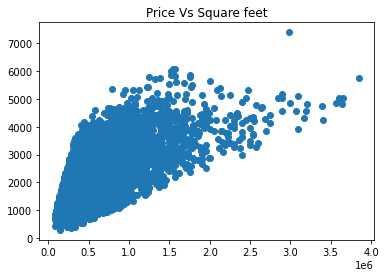

In [131]:
plt.scatter(df6.price, df6.sqft_living)
plt.title("Price Vs Square feet")

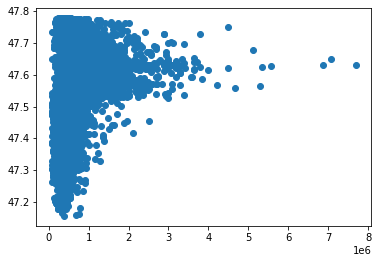

In [135]:
plt.scatter(df2.price, df2.lat)

In [121]:
labels=df6['price_in_lakhs']
train1=df7

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
  train1, labels , random_state=100, test_size=0.20)

In [124]:
from sklearn import ensemble
clf=ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')

In [125]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [126]:
clf.score(X_test, y_test)

0.8484865692276983